In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch

from matplotlib import patches

from utils.distributions import marchenko_pastur_svals

In [95]:
matplotlib.rcParams.update({'font.size': 20})
figsize = (8, 5)

In [96]:
def plot_svals(svals, m, n, sigma, layer, block, with_numbers: bool = False):

    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    y_mp, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)
    y_mp = y_mp / torch.trapezoid(y_mp, x_mp)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    fig, ax = plt.subplots(nrows=1, figsize=figsize)
    
    ax.hist(svals, color = "b", density=True, bins="fd")
    ax.plot(x_mp, y_mp, 
                color = "r", linestyle = "--", linewidth = 2, alpha = 0.7, label = "MP distribution")
    ax.set_xlim(0, x_mp[-1])
    ax.set_xlabel(r"$s$")
    ax.set_ylabel("Density")

    if with_numbers:
        ax.text(0.9, 0.1, "(1)", transform=ax.transAxes, fontweight="bold")
    
    ax.legend()

    fig.suptitle(f"{layer} - Block {block}")

    saving_dir = f"{plot_dir}/svals"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")
    return

In [97]:
def plot_overlaps(svals, overlaps, m, n, sigma, layer, block, with_numbers: bool = False):

    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    y_mp, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)
    y_mp = y_mp / torch.trapezoid(y_mp, x_mp)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    fig, ax = plt.subplots(nrows=1, figsize=figsize)
    
    ax.plot(overlaps, color = "b")
    ax.vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, 
                  color = "r", alpha = 0.7, linestyle = "--", label = "MP bounds")
    ax.grid(alpha=0.5)
    ax.set_ylim(0,0.5)
    ax.set_xlabel(r"$k$")
    ax.set_ylabel(r"$O_k$")

    if with_numbers:
        ax.text(0.9, 0.1, "(2)", transform=ax.transAxes, fontweight="bold")
    
    ax.legend()

    fig.suptitle(f"{layer} - Block {block}")

    saving_dir = f"{plot_dir}/overlaps"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")
    return

In [98]:
def plot_overlaps_comparison(overlaps_a, overlaps_b, label_a, label_b, svals, m, n, sigma, layer, block):

    fig, ax = plt.subplots(figsize=figsize)
    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    _, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    # plotting
    ax.plot(np.arange(overlaps_a.shape[0]), overlaps_a, label = label_a, alpha = 1)
    ax.plot(np.arange(overlaps_b.shape[0]), overlaps_b, label = label_b, alpha = 1)
    mp_bounds = ax.vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", alpha = 0.5, linestyle = "--", label = "MP bounds")
    ax.grid(alpha = 0.7)
    ax.set_ylim(0,0.5)
    
    # pathces
    rectangle = patches.Rectangle((0.02, 0.15), 0.3, 0.4, fill=False, edgecolor='red', linewidth=2, transform=ax.transAxes, zorder=10)
    ax.add_patch(rectangle)

    ax.set_xlabel("Right singular vector index")
    ax.set_ylabel("Overlap")

    ax.set_title(f"{layer} - Block {block}")
    
    ax.legend()

    saving_dir = f"{plot_dir}/overlaps_comparison"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    fig.tight_layout()
    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")
    
    return

In [99]:
def plot_overlaps_comparison_extra(overlaps_a, overlaps_b, label_a, label_b, svals, m, n, sigma, layer, block):

    fig, axs = plt.subplots(nrows=2, figsize=(figsize[0], figsize[1] * 2))
    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    _, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    # plotting
    axs[0].plot(np.arange(overlaps_a.shape[0]), overlaps_a, label = label_a)
    axs[0].plot(np.arange(overlaps_b.shape[0]), overlaps_b, label = label_b)
    axs[0].vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", alpha = 0.7, linestyle = "--", label = "MP bounds")
    axs[0].grid(alpha = 0.7)
    axs[0].set_ylim(0,0.5)
    
    axs[0].tick_params(labelbottom = False, bottom = False)

    axs[0].set_ylabel("Overlap")

    axs[0].legend()

    ###
    
    axs[1].plot(np.arange(overlaps_a.shape[0]), overlaps_a - overlaps_b, color = "g")
    axs[1].vlines(x = [idx_lower, idx_upper], ymin = -1, ymax = 1, color = "r", alpha = 0.7, linestyle = "--", label = "MP bounds")
    axs[1].grid(alpha = 0.7)
    axs[1].set_ylim(-0.15,0.15)

    axs[1].set_xlabel("Right singular vector index")
    axs[1].set_ylabel("Overlap difference")


    fig.suptitle(f"{layer} - Block {block}")
    

    saving_dir = f"{plot_dir}/overlaps_comparison"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    fig.tight_layout()
    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")
    
    return

In [100]:
def plot_overlap_bands(overlaps_a, svals, m, n, sigma, layer, block):

    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    _, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    mean_overlap_a = np.mean(overlaps_a, axis = 1)
    std_overlap_a = np.std(overlaps_a, axis = 1)

    fig, ax = plt.subplots(figsize = figsize)

    ax.plot(mean_overlap_a, color = "blue")

    ax.fill_between(np.arange(mean_overlap_a.shape[0]), 
                     mean_overlap_a - std_overlap_a, 
                     mean_overlap_a + std_overlap_a, 
                     alpha=0.3, 
                     color='blue', 
                     label=r'$\pm 1 \sigma$')

    ax.vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", linestyle = "--", label = "MP bounds")

    
    ax.grid(alpha = 0.5)
    ax.set_ylim(0,0.5)
    
    ax.set_xlabel("Right singular vector index")
    ax.set_ylabel("Overlap")
    
    ax.legend()
    
    fig.suptitle(f"{layer} - Block {block}")
    
    saving_dir = f"{plot_dir}/overlaps_bands"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    # fig.tight_layout()
    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")

    return

In [101]:
def plot_overlap_comparison_bands(overlaps_a, overlaps_b, label_a, label_b, svals, m, n, sigma, layer, block):

    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    _, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    mean_overlap_a = np.mean(overlaps_a, axis = 1)
    std_overlap_a = np.std(overlaps_a, axis = 1)
    mean_overlap_b = np.mean(overlaps_b, axis = 1)
    std_overlap_b = np.std(overlaps_b, axis = 1)

    fig, ax = plt.subplots(figsize = figsize)

    ax.plot(mean_overlap_a, color = "blue", label = label_a)

    ax.plot(mean_overlap_b, color = "orange", label = label_b)

    ax.vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, color = "r", alpha = 0.7, linestyle = "--", label = "MP bounds")

    ax.fill_between(np.arange(mean_overlap_a.shape[0]), 
                     mean_overlap_a - std_overlap_a, 
                     mean_overlap_a + std_overlap_a, 
                     alpha=0.3, 
                     color='blue', 
                     label=r'$\pm 1 \sigma$')

    ax.fill_between(np.arange(mean_overlap_b.shape[0]), 
                     mean_overlap_b - std_overlap_b, 
                     mean_overlap_b + std_overlap_b, 
                     alpha=0.3, 
                     color='orange', 
                     label=r'$\pm 1 \sigma$')

    rectangle = patches.Rectangle((0.02, 0.15), 0.3, 0.4, fill=False, edgecolor='red', linewidth=2, transform=ax.transAxes, zorder=10)
    ax.add_patch(rectangle)
    
    ax.grid(alpha = 0.5)
    ax.set_ylim(0,0.5)
    
    ax.set_xlabel("Right singular vector index")
    ax.set_ylabel("Overlap")
    
    ax.legend(ncol=2)
    
    fig.suptitle(f"{layer} - Block {block}")
    
    saving_dir = f"{plot_dir}/overlaps_comparison"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    # fig.tight_layout()
    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")

    return

In [102]:
def plot_svals_overlaps(svals, overlaps, m, n, sigma, layer, block, with_numbers: bool = False):

    # marchenko-pastur distribution
    x_mp = torch.linspace(np.min(svals), np.max(svals), 1000)
    # the first element is removed because if 0 it leads to division error
    if (x_mp[0] < 1e-6):
        x_mp = x_mp[1:]
    y_mp, s_lower, s_upper = marchenko_pastur_svals(x_mp, sigma, m, n)
    y_mp = y_mp / torch.trapezoid(y_mp, x_mp)

    idx_lower = np.argmin(np.fabs(svals - s_lower))
    idx_upper = np.argmin(np.fabs(svals - s_upper))

    fig, axs = plt.subplots(nrows=2, figsize=(figsize[0], figsize[1] * 2))
    
    axs[0].hist(svals, color = "b", density=True, bins="fd")
    axs[0].plot(x_mp, y_mp, 
                color = "r", linestyle = "--", linewidth = 2, alpha = 0.7, label = "MP distribution")
    axs[0].set_xlim(0, x_mp[-1])
    axs[0].set_xlabel(r"$s$")
    axs[0].set_ylabel("Density")

    if with_numbers:
        axs[0].text(0.9, 0.1, "(1)", transform=axs[0].transAxes, fontweight="bold")
    
    axs[0].legend()
    
    axs[1].plot(overlaps, color = "b")
    axs[1].vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = 1, 
                  color = "r", alpha = 0.7, linestyle = "--", label = "MP bounds")
    axs[1].grid(alpha=0.5)
    axs[1].set_ylim(0,0.5)
    axs[1].set_xlabel(r"$k$")
    axs[1].set_ylabel(r"$O_k$")

    if with_numbers:
        axs[1].text(0.9, 0.1, "(2)", transform=axs[1].transAxes, fontweight="bold")
    
    axs[1].legend()

    fig.suptitle(f"{layer} - Block {block}")

    saving_dir = f"{plot_dir}/svals_overlap"
    if not os.path.isdir(saving_dir):
        os.makedirs(saving_dir) 

    plt.savefig(f"{saving_dir}/h.{block}.{layer}.pdf", bbox_inches="tight")
    return

In [103]:
plot_dir = "presentation/plots/eco"

In [104]:
eco_data_dir = "eco/data"
random_data_dir = "random/data"

In [105]:
layer = "attn.c_attn.v"
block = 10

In [106]:
overlaps_a = pd.read_csv(f"{random_data_dir}/overlaps/{layer}.csv")
overlaps_b = pd.read_csv(f"{eco_data_dir}/overlaps/{layer}.csv")

In [107]:
overlaps_a = overlaps_a.iloc[:,block + 1].to_numpy()
overlaps_b = overlaps_b.iloc[:,block + 1].to_numpy()

In [108]:
svals = pd.read_csv(f"{eco_data_dir}/svals/{layer}.csv")
svals = svals.iloc[:,block]

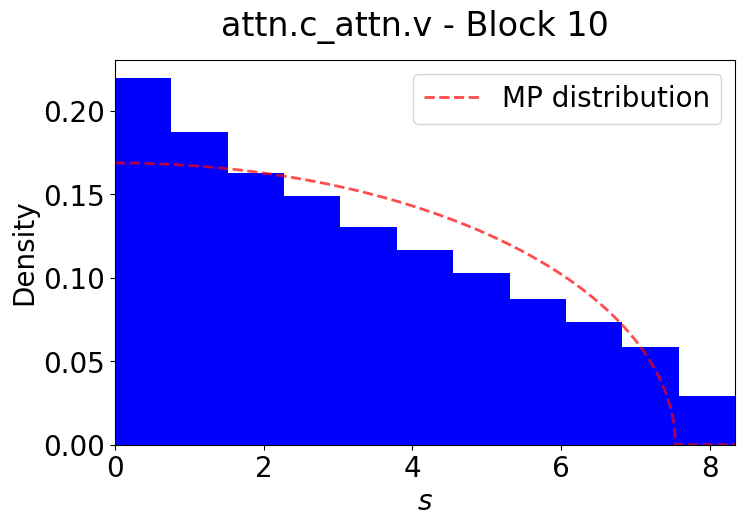

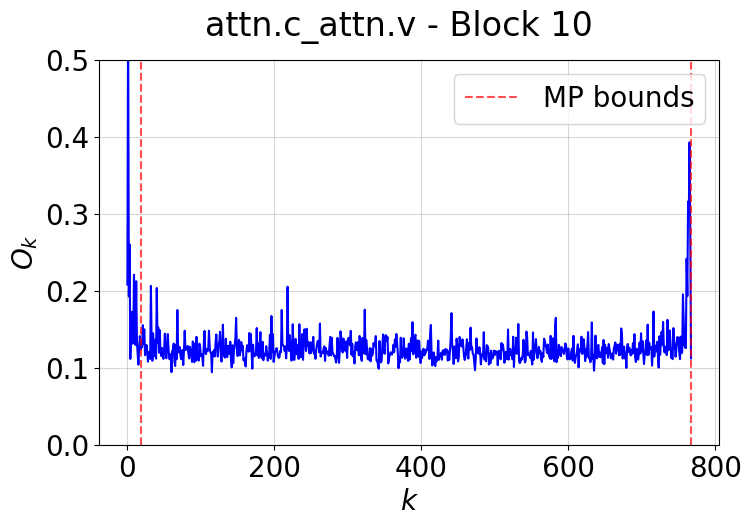

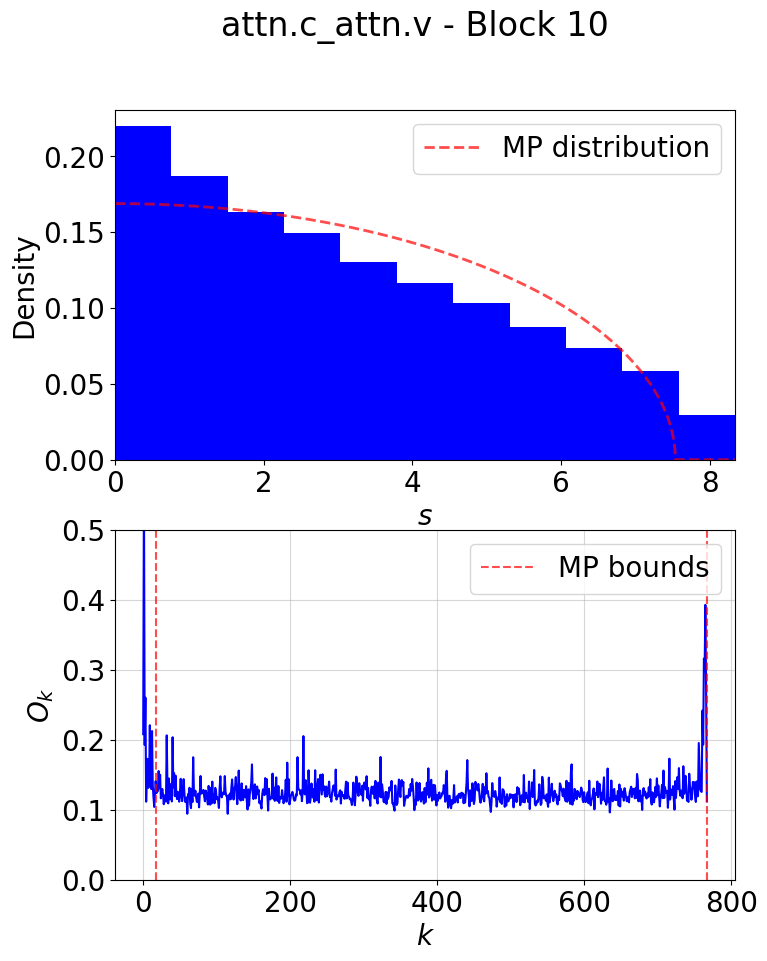

In [109]:
plot_svals(svals.iloc[1:], 768, 768, svals.iloc[0], layer, block)
plot_overlaps(svals.iloc[1:], overlaps_b, 768, 768, svals.iloc[0], layer, block, with_numbers=False)
plot_svals_overlaps(svals.iloc[1:], overlaps_b, 768, 768, svals.iloc[0], layer, block, with_numbers=False)